# Importing Libraries

In [84]:
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import pca

In [86]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [88]:
# Seperating Dependent and independent Variables.
features_df = df.iloc[:, 1:]
target_df = df.iloc[:, 0]

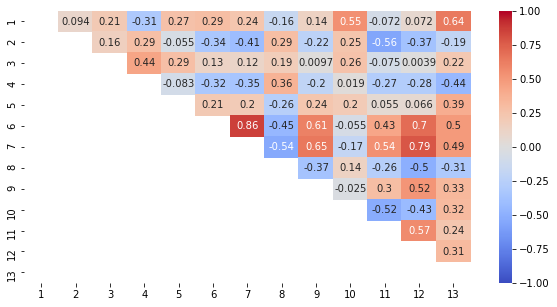

In [112]:
# Correlation Heat map.
plt.figure(figsize = (10,5))
sns.heatmap(features_df.corr(), mask= np.tril(features_df.corr()), cmap='coolwarm', vmin=-1, vmax=1, annot =True)

In [114]:
# Standardizing the Data.
ss = StandardScaler()
Std_feat_df = ss.fit_transform(features_df)

In [91]:
# Covariance Matrix
covariance_matrix = np.cov(Std_feat_df.T)

In [92]:
# Eigenvalues and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigen_df = pd.DataFrame([eigenvalues, eigenvectors], index = ['Eigen Values', 'Eigen Vectors'])
# Sorting based on eigen values 
eigen_df = eigen_df.T.sort_values('Eigen Values', ascending=False)
eigenvectors_sorted = [eigen_df.iloc[index, 1] for index in range(len(eigenvalues))]

In [59]:
# Analyzing the components
tot = sum(eigenvalues)
variance_captured = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cumulative_variance_captured = np.cumsum(variance_captured)
print("Cumulative Variance Explained", cumulative_variance_captured)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


* 96.16 % of the variance is captures upto 10 components. The Dimensions can be reduced by 3, with out a loss of less than 5% variance. 

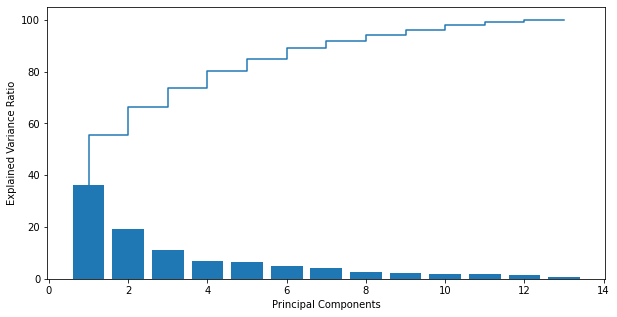

In [115]:
# Visualizing
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), variance_captured,  label = 'Variance Captured')
plt.step(range(1, eigenvalues.size + 1), cumulative_variance_captured,  label = 'Cumulative variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.show()

In [99]:
# New Dimensions.
Principal_components = np.array(eigenvectors_sorted[0:10]).T

In [109]:
# Transforming the data on to the New Dimensions.
pca_projected_data = pd.DataFrame(np.dot(Std_feat_df,Principal_components)) 

In [113]:
# Reduced Data
pca_projected_data.sample(3)

,0,1,2,3,4,5,6,7,8,9
41,1.234381,0.002005,-0.364905,0.041650,-0.348046,-0.332127,0.300465,-0.802599,-1.426054,0.839569
46,0.905332,1.435176,-0.458445,1.513590,-0.583934,-1.378542,-0.379895,-1.099019,-1.669487,0.934556
20,-0.956795,1.148385,-1.439701,1.616896,0.119514,-1.357750,-0.038755,-0.883570,-0.965503,0.235536
